**Assignment 6: Convolutional Neural Network**  
Team:  
*   Nelly Fernanda torres Ramírez 2014788
*   Leyanet Piedra Llanes 2011260
*   Ana Sofía Vara Buentello 2109189
*   Guillermo Gil Flores 1963954
*   Mauricio Alejandro Olivares Mata 1973006

Teacher: Daniel Isaías López Páez  
Class: Artificial Intelligence   
Class schedule: N4, 3

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 28s 80ms/step - accuracy: 0.8278 - loss: 0.6174 - val_accuracy: 0.9603 - val_loss: 0.1478
Epoch 2/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 37s 67ms/step - accuracy: 0.9627 - loss: 0.1295 - val_accuracy: 0.9711 - val_loss: 0.0960
Epoch 3/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 45s 79ms/step - accuracy: 0.9786 - loss: 0.0752 - val_accuracy: 0.9793 - val_loss: 0.0749
Epoch 4/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.9839 - loss: 0.0554 - val_accuracy: 0.9813 - val_loss: 0.0641
Epoch 5/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.9871 - loss: 0.0471 - val_accuracy: 0.9822 - val_loss: 0.0589
Epoch 6/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.9892 - loss: 0.0356 - val_accuracy: 0.9835 - val_loss: 0.0612
Epoch 7/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.9917 - loss: 0.0287 - val_accuracy: 0.9822 - val_loss: 0.0619
Epoch 8/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 25s 77ms/step - accuracy: 0.9929 - loss: 0.0245 - 

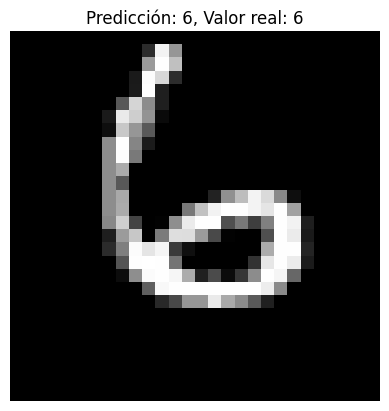

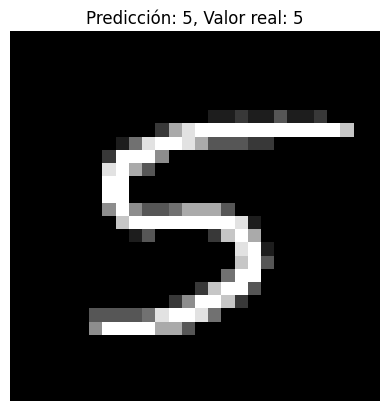

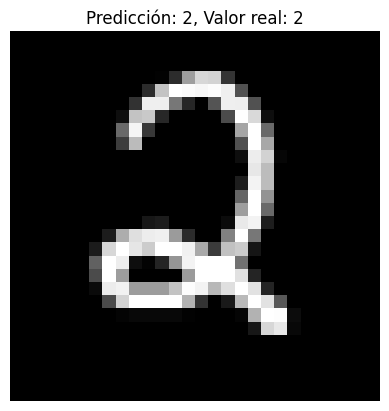

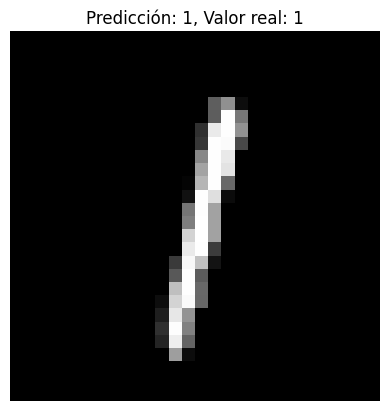

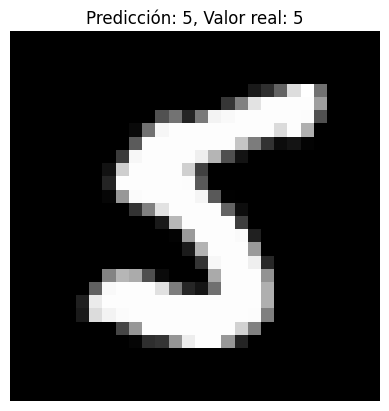

In [ ]:
# Step 1. Importing necessary libraries
import numpy as np #mathematical calculations
import matplotlib.pyplot as plt #graph
from tensorflow.keras.datasets import mnist #dataset of digits
from tensorflow.keras.models import Sequential #type of layered neural network model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten #types of layers
from tensorflow.keras.utils import to_categorical #converts labels to vectors for use in classification
from tensorflow.keras.callbacks import EarlyStopping #to stop automatically

# Step 2. Load the MNIST dataset
(train_data, train_labels), (test_data, test_labels) = mnist.load_data() #loads the split dtaset into data for training and evaluation

# Step 3. Normalize the data (convert to values ​​between 0 and 1)
train_data = train_data.reshape((60000, 28, 28, 1)).astype('float32') / 255 #changes the image format to have 1 channel and converts integers to decimals
test_data = test_data.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Step 4. Encode vectors (transform labels to 10-digit vectors for the output of the network that has 10 neurons)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Step 5. Create the Convolutional Neural Network model
model = Sequential() #linear model, layer upon layer
model.add(
    Conv2D( #convolutional layer used to work with images
        filters=32, #layer will apply 32 filters or kernels to search for specific features
        kernel_size=(3, 3), #each filter will be 3x3 pixels in size.
        activation='relu', #ReLU activation that activates neurons with positive values
        input_shape=(28, 28, 1) #defines the input size for the first layer
    )
)
model.add(MaxPooling2D((2, 2))) #reduce the image size
model.add(Flatten()) #converts the 2D matrix into a 1D vector
model.add(Dense(64, activation='relu')) #dense layer with 64 hidden neurons
model.add(Dense(10, activation='softmax')) #output layer with softmax

# Step 6. Compile the model
model.compile(optimizer='adam', #algorithm to update the weights
              loss='categorical_crossentropy', #loss function for multi-class classification
              metrics=['accuracy']) #metric to measure performance


# Step 7. EarlyStopping to find the best time automatically
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Step 8. Train the model
history = model.fit(train_data, train_labels,
                    epochs=30, #maximum number of epochs allowed
                    batch_size=150, #150 images are processed at a time
                    validation_split=0.2, #evaluates the performance of the model during training with a validation set
                    callbacks=[early_stop], #it will stop when there is no further improvement
                    verbose=1)

# Step 9. Evaluate the model with test data
test_loss, test_acc = model.evaluate(test_data, test_labels) #evaluates the model on the test data
print(f'\nPrecisión del modelo en datos de prueba: {test_acc:.3f}')

# Step 10. Select random numbers
random_indices = np.random.choice(len(test_data), size=5, replace=False) #choose 5 random indices without repeating

# Step 11. Make predictions
predictions = model.predict(test_data[random_indices]) #makes predictions of the 5 selected random numbers

# Step 12. Show
for i, idx in enumerate(random_indices): #loop iterates through the 5 random indices
    plt.imshow(test_data[idx].reshape(28, 28), cmap='gray') #displays the idx image in grayscale
    plt.title(f'Predicción: {np.argmax(predictions[i])}, Valor real: {np.argmax(test_labels[idx])}') #returns the number with the highest probability predicted by the model and the actual label respectively
    plt.axis('off')
    plt.show()